In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [7]:
dfs = pd.read_excel('Q3 - Amadeus Case Study (Business Analyst)  .xlsx',sheet_name=None)
dfs.keys()

dict_keys(['Data', 'Q3-1', 'Q3.2', 'Q3.3'])

In [8]:
df = dfs["Data"]
df.head()

,id,Gender,Customer Type,Age,Age Range,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8,Female,Loyal Customer,60,40+,Business travel,Business,853,4,3,...,3,3,4,3,3,3,4,0,3.0,satisfied
1,12,Female,disloyal Customer,27,26-40,Business travel,Business,421,1,2,...,1,2,5,4,1,3,1,20,21.0,neutral or dissatisfied
2,21,Female,Loyal Customer,14,0-18,Personal Travel,Eco,853,3,1,...,4,1,3,2,4,3,4,12,1.0,neutral or dissatisfied
3,30,Male,Loyal Customer,48,40+,Business travel,Business,3088,4,4,...,4,4,4,4,3,4,3,0,12.0,satisfied
4,45,Male,Loyal Customer,56,40+,Business travel,Business,173,0,5,...,4,4,3,3,4,4,5,30,14.0,satisfied


We don't have almost any null values in our dataset. We got only 26 got null values in our Arrival Delay in Minutes column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9999 non-null   int64  
 1   Gender                             9999 non-null   object 
 2   Customer Type                      9999 non-null   object 
 3   Age                                9999 non-null   int64  
 4   Age Range                          9999 non-null   object 
 5   Type of Travel                     9999 non-null   object 
 6   Class                              9999 non-null   object 
 7   Flight Distance                    9999 non-null   int64  
 8   Inflight wifi service              9999 non-null   int64  
 9   Departure/Arrival time convenient  9999 non-null   int64  
 10  Ease of Online booking             9999 non-null   int64  
 11  Gate location                      9999 non-null   int64

In [10]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Age Range                             0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0


In [11]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9973.000000
mean,64957.287729,39.303530,1198.549855,2.731373,3.038804,2.753475,2.968797,3.208921,3.240224,3.411141,3.335334,3.365837,3.346435,3.619762,3.285429,3.627263,3.268127,14.786879,15.243658
std,37417.457077,15.117225,1001.449582,1.328232,1.528124,1.403255,1.284273,1.339782,1.350801,1.325983,1.340531,1.288297,1.311464,1.190007,1.268960,1.181381,1.321122,38.219134,38.811841
min,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32342.000000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,64944.000000,40.000000,852.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97581.500000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


# Target Variable
Here we got satisfaction column which has "satisfied" or "neutral or dissatisfied", binary variable. 

In [12]:
df["satisfaction"].value_counts()

neutral or dissatisfied    5689
satisfied                  4310
Name: satisfaction, dtype: int64

C:\Users\sekan\AppData\Local\Temp\ipykernel_17600\1431890344.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["satisfaction"], palette="viridis")


Text(0, 0.5, '')

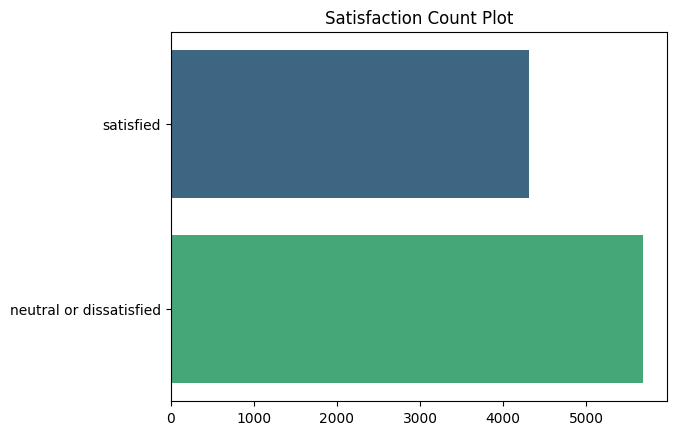

In [13]:
sns.countplot(df["satisfaction"], palette="viridis")
plt.title("Satisfaction Count Plot")
plt.xlabel("")
plt.ylabel("")

### 3.2 Type of Travel: Business travel olan ve 18 yaş üzerindeki müşterileri filtreleyebilir misin?

In [14]:
df2 = df[(df["Age Range"] != "0-18") & (df["Type of Travel"] == "Business travel")]
df2.reset_index(drop=True, inplace=True) # Reset index, so that we will have a continuous index
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6675 entries, 0 to 6674
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 6675 non-null   int64  
 1   Gender                             6675 non-null   object 
 2   Customer Type                      6675 non-null   object 
 3   Age                                6675 non-null   int64  
 4   Age Range                          6675 non-null   object 
 5   Type of Travel                     6675 non-null   object 
 6   Class                              6675 non-null   object 
 7   Flight Distance                    6675 non-null   int64  
 8   Inflight wifi service              6675 non-null   int64  
 9   Departure/Arrival time convenient  6675 non-null   int64  
 10  Ease of Online booking             6675 non-null   int64  
 11  Gate location                      6675 non-null   int64

### Handling null values
Since sciki-learn's classification trees don't support datasets with missing values, we need to figure out what to do with our missing values in arrival Delay in Minutes column. 
### 2 Options 
1. We can either delete them which seems actually pretty doable in our case since they are only 17 rows.


2. Or impute them with a logic. This seems way very reasonable because we have departure delay column as well. So, it makes sense to assume that if the plane departure delay is, let's say 10 minutes, roughly the arrival delay will also be 10 minutes. Acutally, when we plot these on a scatter plot, it supports our argument. Let's see it in the following code cells. 

In [15]:
df2.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Age Range                             0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             17
satisfaction                          0


<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

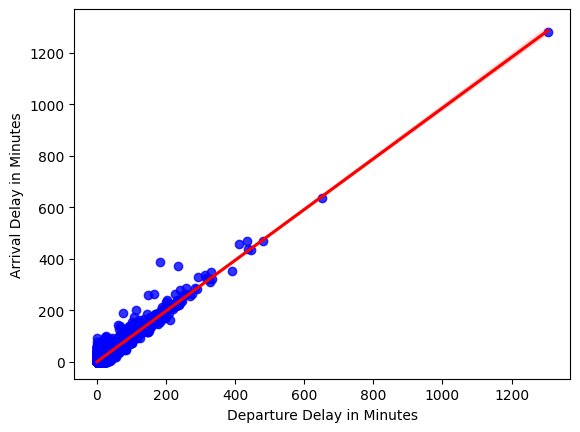

In [16]:
# plotting departure delay versus arrival delay on a scatter plot
sns.regplot(x="Departure Delay in Minutes", 
            y="Arrival Delay in Minutes", data=df2, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

This is a pretty straight line. 

In [17]:
# So let's fill out the missing values in Arrival Delay in Minutes with the Departure Delay in Minutes
df2["Arrival Delay in Minutes"].fillna(df2["Departure Delay in Minutes"], inplace=True)

c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### 3.2 Continued => Veriyi analiz ettiğinde bu müşteri segmentinde “satisfaction” verisinin olumlu ya da olumsuz olmasına etki eden en büyük faktörler nelerdir?

# For this question we will use RandomForestClassifier in order to determine feature importances to target variable

## Let's start our model development phase with preprocessing that we need to do
Our Categorical variables;
* Gender         => Female, Male 
* Customer Type  => Loyal Customer, disloyal Customer
* Age Range      => 19-26, 26-40, 40+   note: I didin't add 0-18 since we are excluding it for this question.
* Type of Travel => For this question we have filtered it down into Business travel so we won't use it as a variable in our model.
* Class => Business, Eco, Eco Plus
### We got a bunch of ordinal categorical variables which are rates of customers ranging from 0 to 5;
* Inflight wifi service
* Departure/Arrival time convenient
* Ease of Online booking
* Gate location
* Food and drink
* Online boarding
* Seat comfort
* Inflight entertainment
* On-board service
* Leg room service
* Baggage handling
* Checkin service
* Inflight service
* Cleanliness


### Encoding our categorical variables 

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder()
le = LabelEncoder()

In [19]:
categorical_columns = df2.select_dtypes(include="object").columns
# Since we will use LabelEncoder to encode the target column, 
# we will exclude it from the categorical columns
categorical_columns = categorical_columns.drop("satisfaction")
target = "satisfaction"
print(categorical_columns)
print(target)

Index(['Gender', 'Customer Type', 'Age Range', 'Type of Travel', 'Class'], dtype='object')
satisfaction


In [20]:

ohed = ohe.fit_transform(df2[categorical_columns])
led = le.fit_transform(df2[target])
ohed = pd.DataFrame(ohed.toarray(), columns=ohe.get_feature_names_out(categorical_columns))
ohed

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age Range_19-26,Age Range_26-40,Age Range_40+,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6670,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6671,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6672,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6673,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
le.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

* 0 => neutral or dissatisfied
* 1 => satisfied in our "satisfaction" variable column.

In [22]:
led

array([1, 0, 1, ..., 1, 1, 1])

In [23]:
df2 = pd.concat([df2, ohed], axis=1) # Concatenate the one-hot encoded columns to the original dataframe
df2.drop(categorical_columns, axis=1, inplace=True) # Drop the original categorical columns
df2.drop(target, axis=1, inplace=True) # Drop the original target column
df2[target] = led # Add the encoded target column to the dataframe
df2 # Hooray! we have a dataframe with one-hot encoded columns ready for Random Forest Classifier

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age Range_19-26,Age Range_26-40,Age Range_40+,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,8,60,853,4,3,4,4,4,4,4,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
1,12,27,421,1,2,2,4,1,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
2,30,48,3088,4,4,5,4,3,4,4,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
3,45,56,173,0,5,0,3,2,5,4,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,51,44,1859,2,2,4,2,5,5,5,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,129736,32,308,3,3,3,3,5,5,5,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
6671,129759,19,337,2,0,1,2,3,1,3,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
6672,129855,56,1972,0,0,0,4,3,5,5,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
6673,129860,22,447,0,1,0,2,2,0,2,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1


# Splitting the data into training and test data

In [24]:
# Let's split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Before splitting our data into training and testing sets, we will split it into 
# features(independent) and target(dependent) variable
X = df2.drop(["satisfaction","id", "Age"], axis=1) # We dropped Age because we have Age Range
y = df2["satisfaction"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling - RandomForestClassifier & Decision Trees

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [26]:
# let's evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.9363295880149812
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.92      0.92       553
           1       0.95      0.95      0.95       782

    accuracy                           0.94      1335
   macro avg       0.93      0.93      0.93      1335
weighted avg       0.94      0.94      0.94      1335

Confusion Matrix:  [[511  42]
 [ 43 739]]


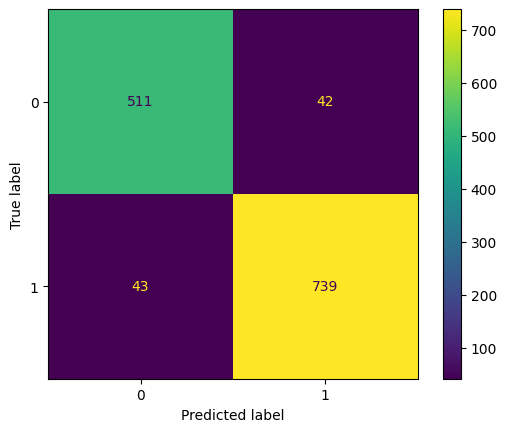

In [27]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

### Plot the feature importance bar plot 

<Axes: xlabel='importance', ylabel='feature'>

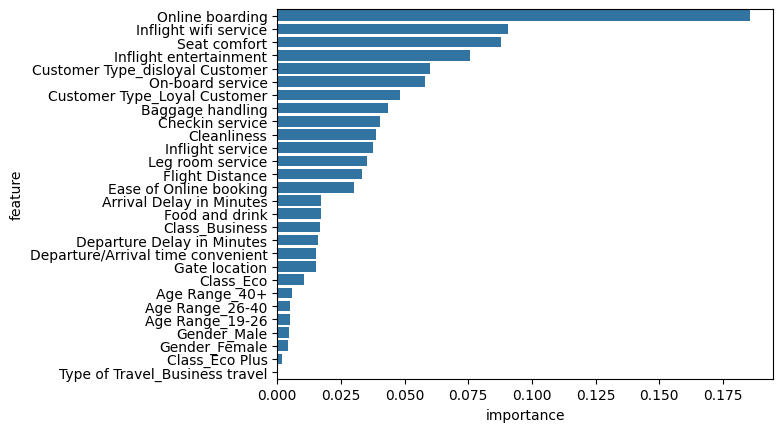

In [28]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importances)

### Feature selection based on a threshold. 

In [29]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.02) # You can adjust the threshold
sfm.fit(X_train, y_train)

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

rf_important = RandomForestClassifier(n_estimators=100, random_state=42)
rf_important.fit(X_important_train, y_train)

y_important_pred = rf_important.predict(X_important_test)

In [30]:
# let's evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_important_pred))
print("Classification Report: ", classification_report(y_test, y_important_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_important_pred))

Accuracy Score:  0.9453183520599251
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.95      0.93       553
           1       0.96      0.95      0.95       782

    accuracy                           0.95      1335
   macro avg       0.94      0.95      0.94      1335
weighted avg       0.95      0.95      0.95      1335

Confusion Matrix:  [[523  30]
 [ 43 739]]


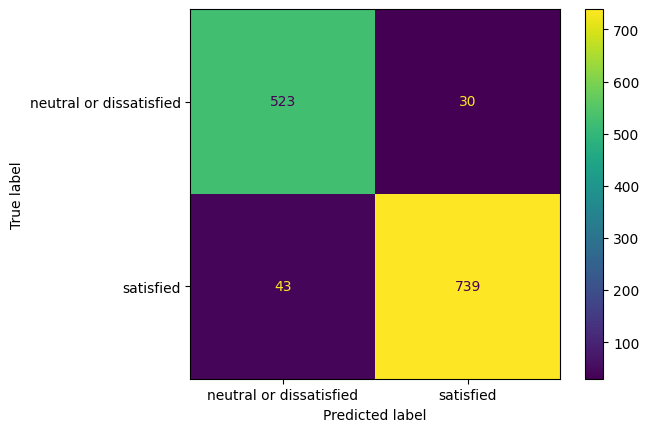

In [31]:
# Let's plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_important, X_important_test, y_test, display_labels=["neutral or dissatisfied", "satisfied"])

We can see that our model performance has improved with feature selection.

Out of 782 people who satisfied from the service, our model guessed correctly **739/782(95%)**
<br>
Out of 553 peopel who got neutral or dissatisfied, our model guessed this group correctly 
**523/553(93)**
<br>
<br>
So, this model performs pretty well. When we look at the feature importances, there are a few of them shines. Let's check them out and answer our question
<br>
<br>
Veriyi analiz ettiğinde bu müşteri segmentinde **“satisfaction”** verisinin olumlu ya da olumsuz
olmasına etki eden en büyük faktörler nelerdir?

In [32]:
feature_importances[:10] # Top 10 important features

,feature,importance
6,Online boarding,0.185438
1,Inflight wifi service,0.090499
7,Seat comfort,0.087856
8,Inflight entertainment,0.075671
20,Customer Type_disloyal Customer,0.060111
9,On-board service,0.057960
19,Customer Type_Loyal Customer,0.048201
11,Baggage handling,0.043679
12,Checkin service,0.040212
14,Cleanliness,0.038953


# In order to see how impactful those features on our target variable, we could look at their histogram by our target variable.


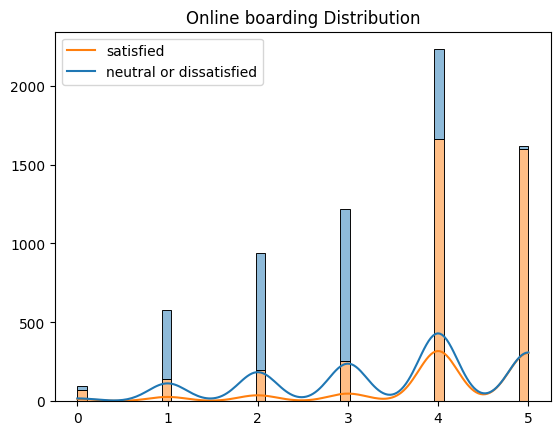

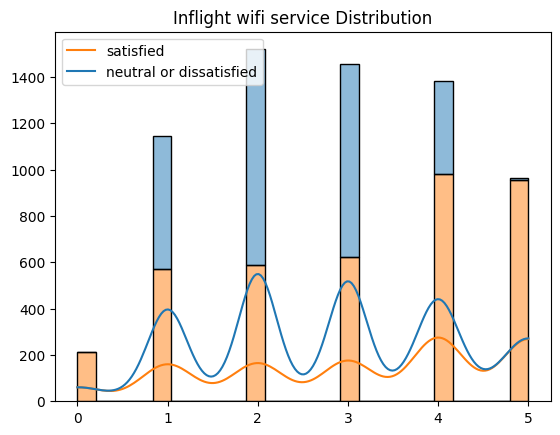

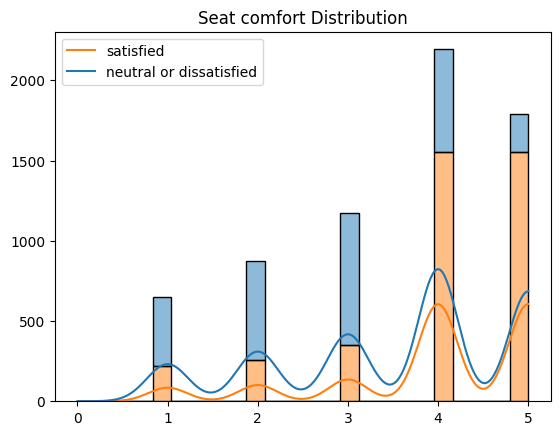

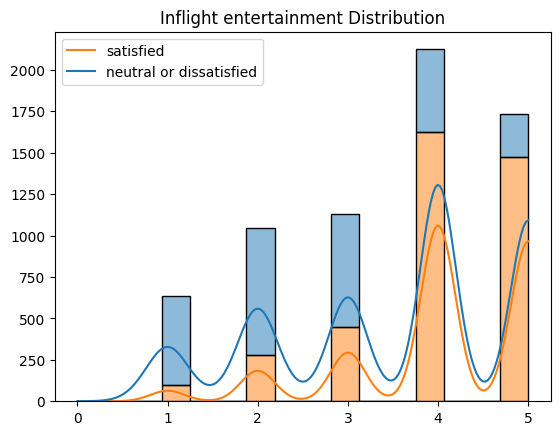

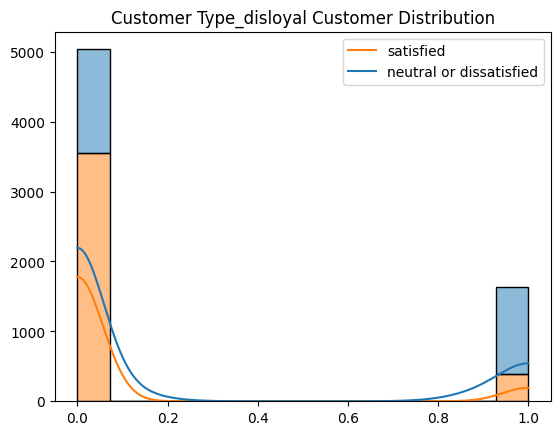

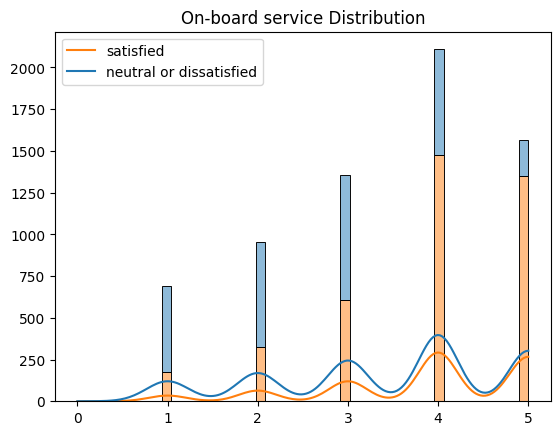

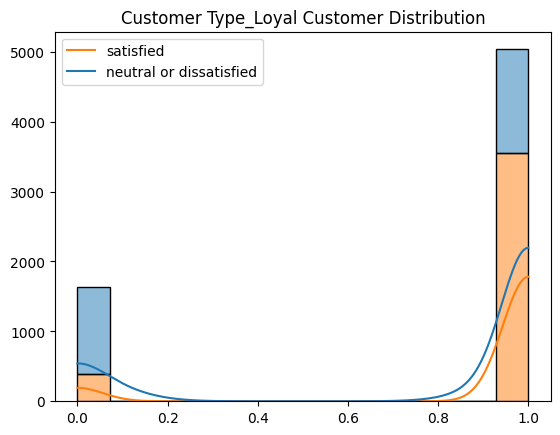

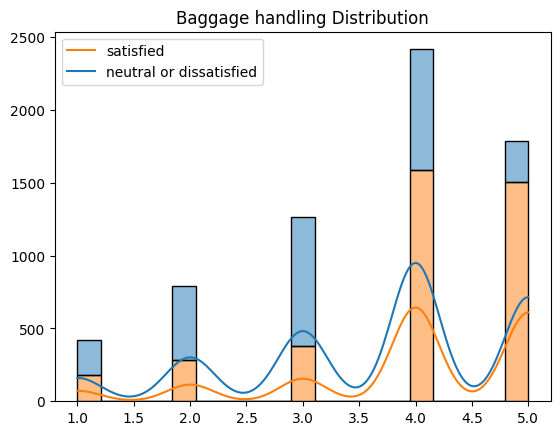

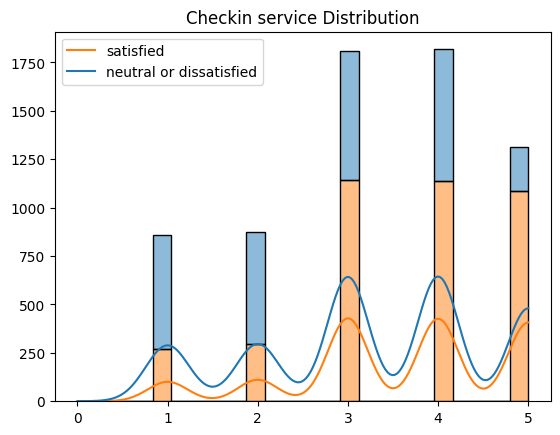

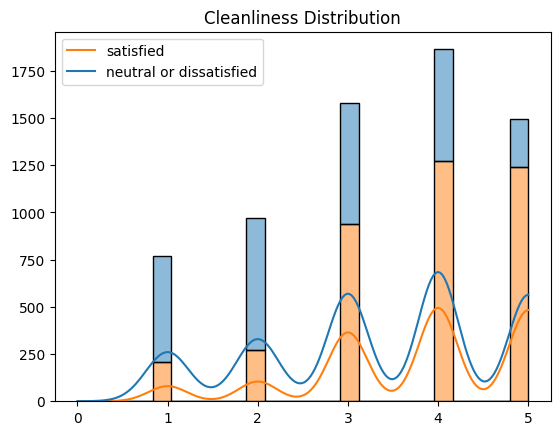

In [33]:
# let's build those histograms first 10 important features
for feature in feature_importances['feature'][:10]:
    sns.histplot(data=df2, x=feature, hue='satisfaction', multiple='stack', kde=True)
    plt.legend(["satisfied", "neutral or dissatisfied"])
    plt.title(f"{feature} Distribution")
    plt.ylabel("")
    plt.xlabel("")
    plt.show()

In [34]:
feature_importances[:10]["feature"]

6                     Online boarding
1               Inflight wifi service
7                        Seat comfort
8              Inflight entertainment
20    Customer Type_disloyal Customer
9                    On-board service
19       Customer Type_Loyal Customer
11                   Baggage handling
12                    Checkin service
14                        Cleanliness
Name: feature, dtype: object

We figure out that Online boarding and Inflight wifi services are really important for our customers. When they like and give 5 star to our online boarding, we almost 99% sure that they will be satisfied.

# Further add-ups